In [35]:
import warnings

warnings.filterwarnings("ignore")

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adaptive_al_v2.utils.data_loader import *
from collections import Counter
from itertools import chain
from wordcloud import WordCloud, STOPWORDS

sns.set_theme(style="whitegrid")

# AG News

## Load Dataset

In [37]:
_,(df_train, df_val, df_test) = load_agnews()
#shapes
print(f"Train size: {df_train.shape}")
print(f"Validation size: {df_val.shape}")
print(f"Test size: {df_test.shape}")

Train size: (108000, 2)
Validation size: (12000, 2)
Test size: (7600, 2)


In [38]:
df = pd.concat([df_train, df_val]) # Exploring only the data that we see
df.head()

,text,label
0,10 seconds that change everything. ATHENS - Te...,1
1,Charline Labonte rises to challenge. Charline ...,1
2,Ex-El Paso Traders Plead Guilty to False Repor...,2
3,Brit deal #39;one year only. Even if British ...,1
4,"Signed, Sealed, Delivered. CHICAGO - The Cubs ...",1


In [39]:
print(f"The labels are: {sorted(df["label"].unique().tolist())}")

The labels are: [0, 1, 2, 3]


## Class Balance

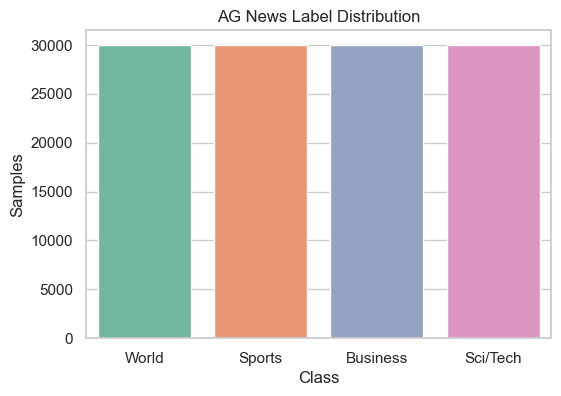

In [40]:
label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}

# Plotting a barplot of the label distribution
label_counts = df["label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=label_map.values(), y=label_counts.values, palette="Set2")
plt.title("AG News Label Distribution")
plt.ylabel("Samples")
plt.xlabel("Class")
plt.show()

## Text Length Distribution

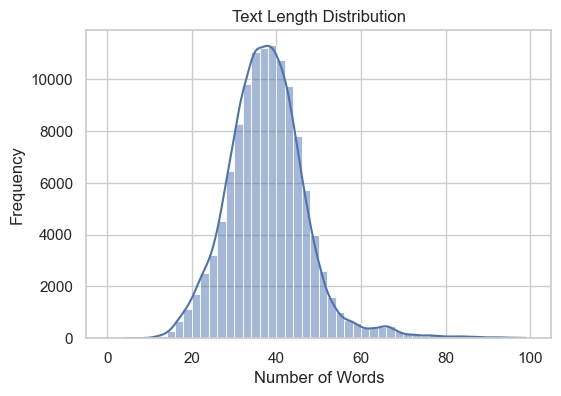

In [41]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

# Plotting a histogram of the text length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df[df["text_length"]<100]['text_length'], bins=range(0,101,2), kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

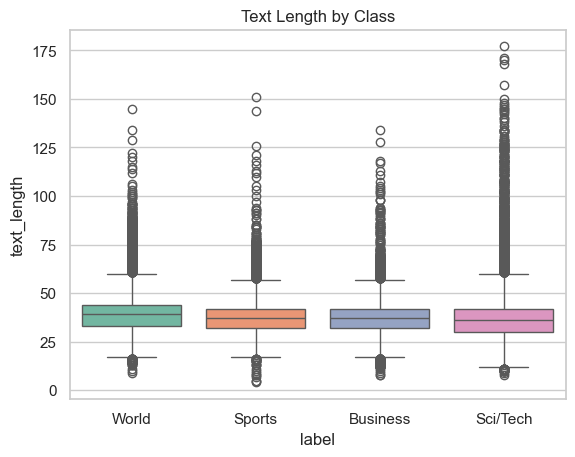

In [42]:
# Plotting box plots of the text length by class
ax = sns.boxplot(x="label", y="text_length", data=df, palette="Set2")
ax.set_xticklabels(label_map.values())
plt.title("Text Length by Class")
plt.show()

In [43]:
for label_id, label_name in label_map.items():
    print(f"\nExample from class: {label_name}")
    sample = df[df["label"] == label_id].iloc[0]
    print(sample["text"])


Example from class: World
Explosions caused mushroom cloud over N. Korea: source. SEOUL, SOUTH KOREA - A mushroom-shaped cloud was seen in North Korea last Thursday following a large explosion, a South Korean news agency reported Sunday.

Example from class: Sports
10 seconds that change everything. ATHENS - Ten seconds. Barely time enough to tie a shoe, wash a glass, get the paper off the porch. But when the moment comes, and eight men kneel at their blocks and peer down the empty, waiting track, it is as if the entire Olympics stop to watch.

Example from class: Business
Ex-El Paso Traders Plead Guilty to False Reports. Two more former natural gas traders for El Paso Corp. have pleaded guilty to reporting bogus deals in a widening investigation of the industry, the US Attorney #39;s Office said.

Example from class: Sci/Tech
XBox Owner Sues Microsoft. drusoicy writes  quot;Reuters is reporting that Sean Burke has filed suit against Microsoft because his XBox system stopped reading d

## Unique Word Count

In [44]:
tokenized = df["text"].apply(lambda x: str(x).lower().split())
vocab = Counter(chain.from_iterable(tokenized))
print(f"Unique words in training set: {len(vocab)}")

Unique words in training set: 164438


## Most Frequent Words Per Class

In [45]:
stopwords = set(STOPWORDS)

for label_id, label_name in label_map.items():
    subset = df[df["label"] == label_id]
    words = " ".join(subset["text"]).lower().split()

    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

    common = Counter(filtered_words).most_common(10)

    print(f"\nTop words in {label_name}:")
    for word, freq in common:
        print(f"  {word}: {freq}")


Top words in World:
  said: 5492
  president: 3900
  iraq: 3854
  us: 3634
  new: 3439
  two: 3305
  minister: 3067
  killed: 2927
  ap: 2781
  will: 2394

Top words in Sports:
  new: 4085
  first: 3840
  will: 3566
  ap: 3119
  game: 2901
  win: 2869
  world: 2836
  team: 2735
  last: 2732
  two: 2629

Top words in Business:
  said: 6655
  new: 6504
  oil: 5998
  us: 5459
  will: 3981
  prices: 3583
  company: 3253
  york: 3014
  percent: 2643
  stocks: 2430

Top words in Sci/Tech:
  new: 7014
  will: 4533
  microsoft: 4478
  said: 3219
  software: 3017
  internet: 2817
  company: 2287
  first: 2102
  space: 2072
  search: 2058


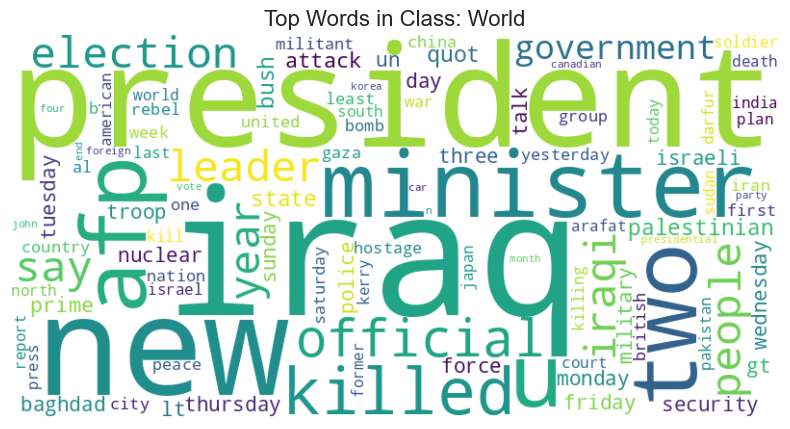

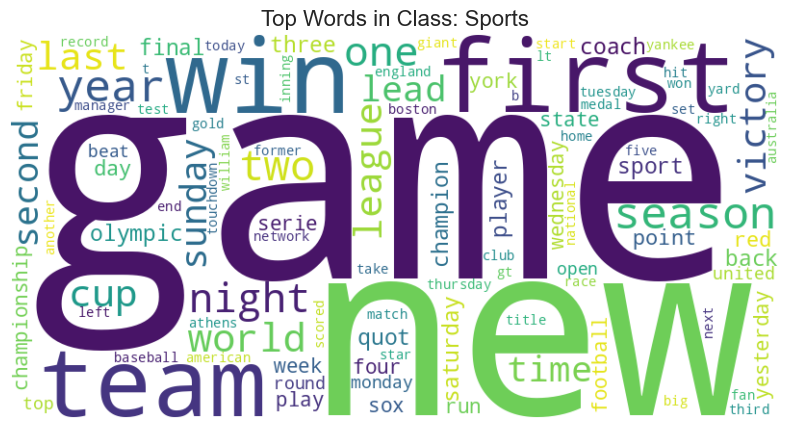

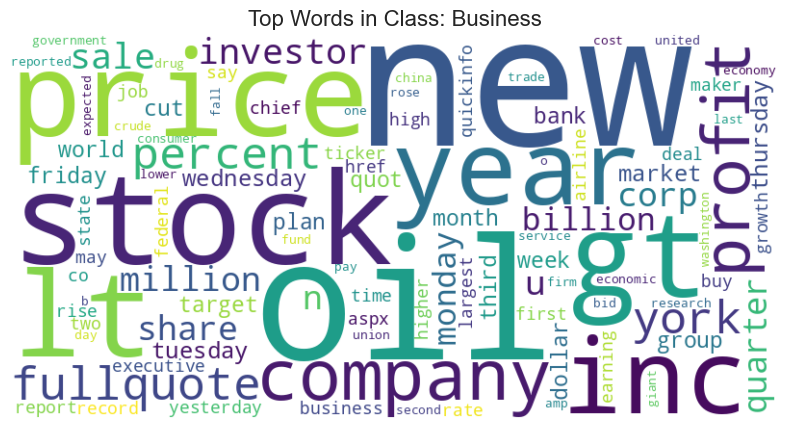

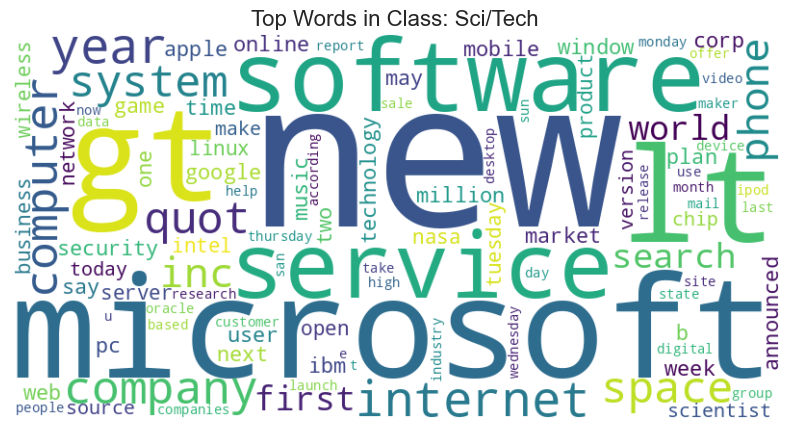

In [46]:
# Combine default stopwords with some custom ones
custom_stopwords = set(STOPWORDS).union({"said", "will", "us", "reuters", "s", "ap"})
for label_id, label_name in label_map.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=custom_stopwords, max_words=100, collocations=False).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in Class: {label_name}", fontsize=16)
    plt.show()

# IMDB

## Load Dataset

In [47]:
_,(df_train, df_val, df_test) = load_imdb()

df = pd.concat([df_train, df_val])
print(df.shape)
df.head()

(40000, 2)


,text,label
0,He really lost the plot with this one! None of...,0
1,I loved this movie when I was a teenager. LOVE...,0
2,This film almost gave me a nervous breakdown. ...,0
3,This movie was supposedly based on a non-ficti...,0
4,What a fascinating film. Even if it wasn't bas...,1


##  Label Distribution

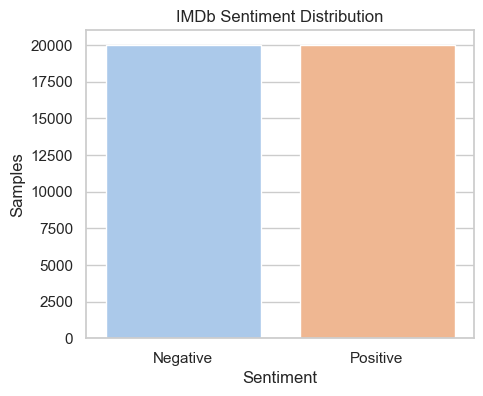

In [48]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="label", palette="pastel")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.title("IMDb Sentiment Distribution")
plt.ylabel("Samples")
plt.xlabel("Sentiment")
plt.show()

##  Text Length Analysis

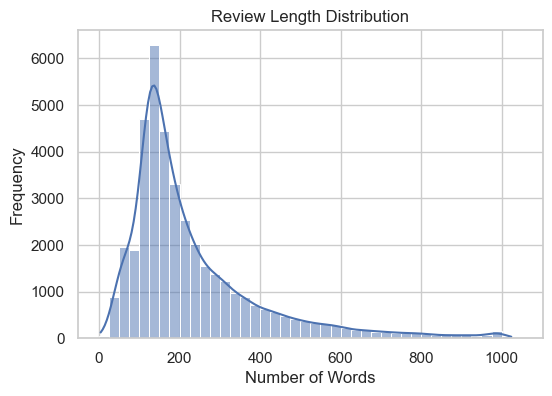

In [56]:
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6, 4))
sns.histplot(df[df["text_length"]<1050]['text_length'], bins=range(0,1051,25), kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

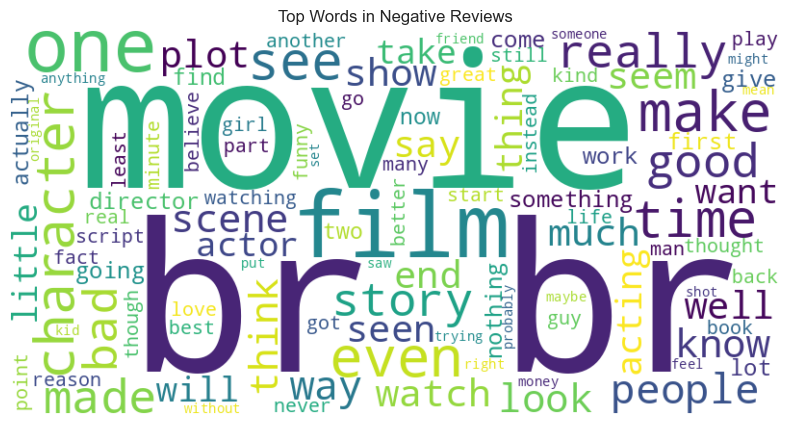

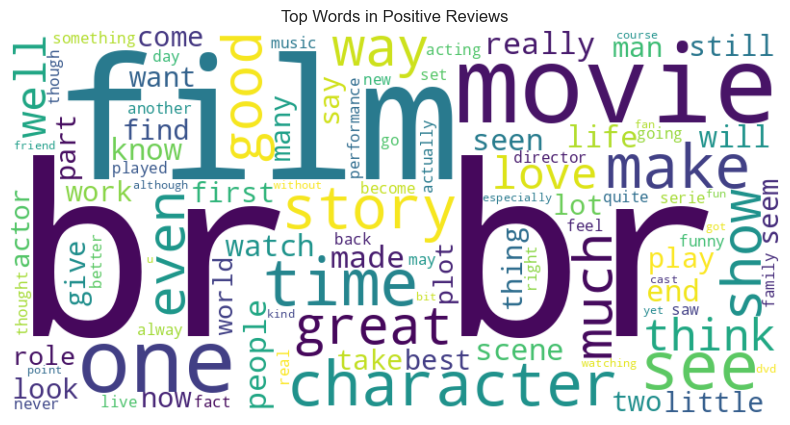

In [50]:
stopwords = set(STOPWORDS)

for label_id, label_name in {0: "Negative", 1: "Positive"}.items():
    subset = df[df["label"] == label_id]
    text_blob = " ".join(subset["text"]).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Reviews")
    plt.show()


# Jigsaw

## Load Dataset

In [51]:
df_train, df_val, df_test = load_jigsaw()
df = pd.concat([df_train, df_val, df_test])
df.head()


KeyError: 'label'

## Label Distribution

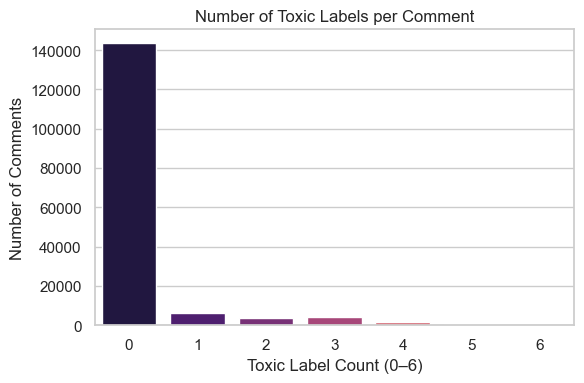

In [5]:
# Define the label columns again for clarity
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Count how many labels each comment has
df["num_labels"] = df[label_cols].sum(axis=1)

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="num_labels", palette="magma")

plt.title("Number of Toxic Labels per Comment")
plt.xlabel("Toxic Label Count (0–6)")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

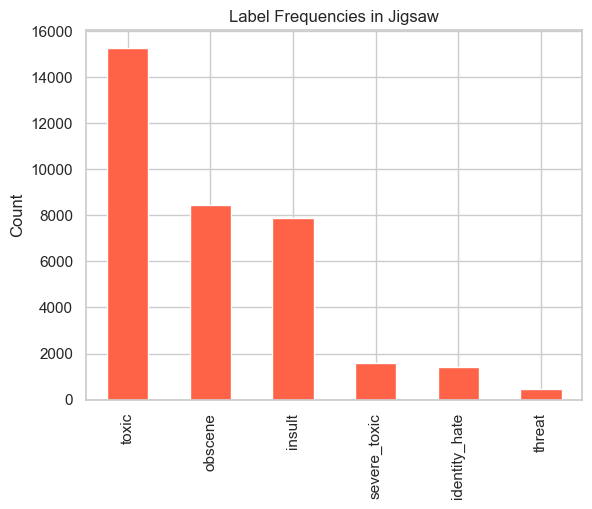

In [6]:
df[label_cols].sum().sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title("Label Frequencies in Jigsaw")
plt.ylabel("Count")
plt.show()


## Text Length Analysis

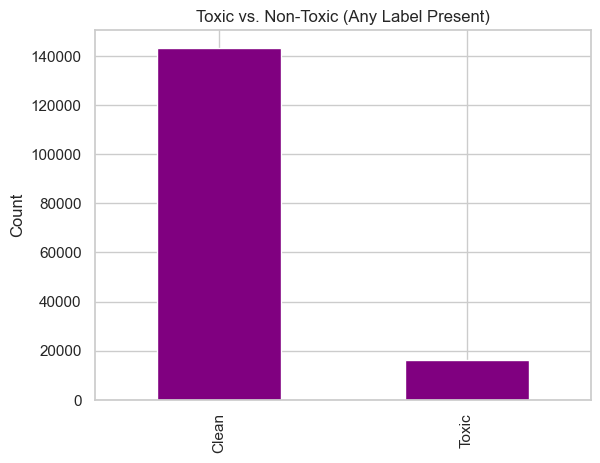

In [10]:
df["is_toxic"] = (df[label_cols].sum(axis=1) > 0).astype(int)
df["is_toxic"].value_counts().plot(kind='bar', color='purple')
plt.title("Toxic vs. Non-Toxic (Any Label Present)")
plt.xticks([0, 1], ["Clean", "Toxic"])
plt.ylabel("Count")
plt.show()


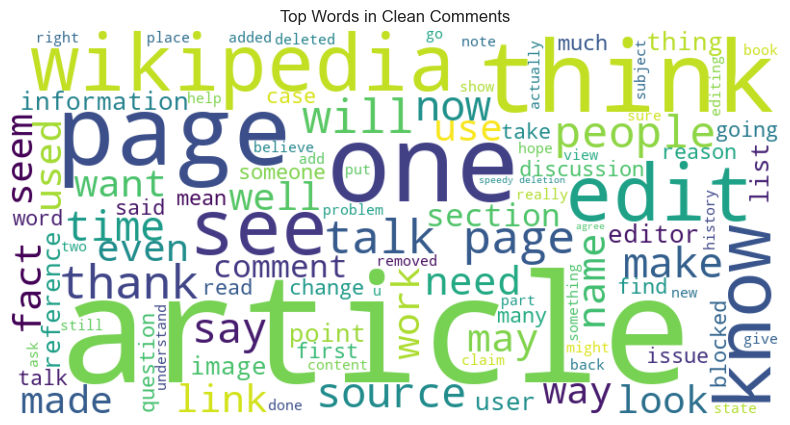

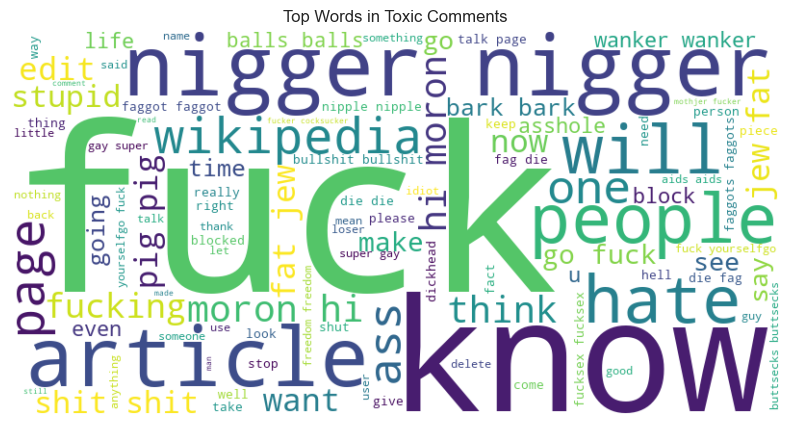

In [12]:
stopwords = set(STOPWORDS)

for label_val, label_name in {0: "Clean", 1: "Toxic"}.items():
    subset = df[df["is_toxic"] == label_val]
    text_blob = " ".join(subset["text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Comments")
    plt.show()
